# Project baseline model 

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img

### Neural Networks 
- basic model 

In [48]:
# augments image by iteratting through image a
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   brightness_range = [0.9, 1],
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
#load data set 
training_set = train_datagen.flow_from_directory(r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train', 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                 subset = 'training'
                                                )
validation_gen = train_datagen.flow_from_directory(r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\train', 
                                                target_size = (150,150),
                                                batch_size = 16,
                                                subset = 'validation'
                                            
                                                )
test_set = test_datagen.flow_from_directory(r'C:\Users\tonym\Documents\Flatiron\phase_4\project_data\test', 
                                                target_size = (150,150),
                                                batch_size = 16
                                                )


Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


(16, 150, 150, 3)


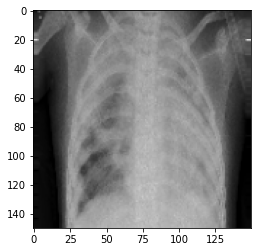

(16, 150, 150, 3)


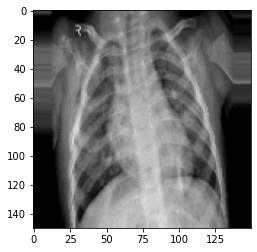

(16, 150, 150, 3)


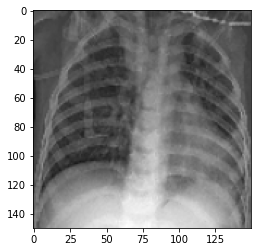

(16, 150, 150, 3)


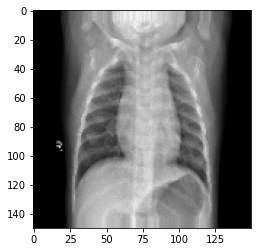

(16, 150, 150, 3)


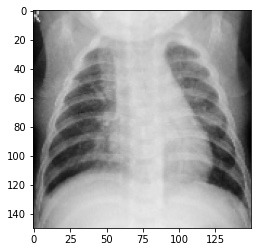

In [53]:
for _ in range(5):
    img, label = training_set.next()
    print(img.shape)   #  (32,150,150,3)
    plt.imshow(img[0])
    plt.show()


In [54]:
model = keras.Sequential(
    [
        keras.Input(shape= (150,150,3)), 
        layers.Flatten(), 
        layers.Dense(64, activation="relu"),
        layers.Dense(2, activation="sigmoid"),
         ])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4320064   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,320,194
Trainable params: 4,320,194
Non-trainable params: 0
_________________________________________________________________


In [55]:
# compile model 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Recall'])

In [56]:
# fit the model 
# Fit our model (save output to a history variable)
baseline = model.fit_generator(training_set, 
                    steps_per_epoch =52 ,                     
                    epochs=10 , 
                    validation_data = validation_gen,
                    validation_steps = 10)

Epoch 1/10
52/52 [==============================] - 16s 316ms/step - loss: 4.1854 - accuracy: 0.7019 - recall: 0.7031 - val_loss: 1.4783 - val_accuracy: 0.7875 - val_recall: 0.7750
Epoch 2/10
52/52 [==============================] - 16s 311ms/step - loss: 0.6438 - accuracy: 0.8396 - recall: 0.8396 - val_loss: 0.8492 - val_accuracy: 0.8250 - val_recall: 0.8250
Epoch 3/10
52/52 [==============================] - 18s 353ms/step - loss: 0.8207 - accuracy: 0.8173 - recall: 0.8113 - val_loss: 0.3816 - val_accuracy: 0.8500 - val_recall: 0.8500
Epoch 4/10
52/52 [==============================] - 23s 433ms/step - loss: 0.7072 - accuracy: 0.8663 - recall: 0.8651 - val_loss: 0.6199 - val_accuracy: 0.8250 - val_recall: 0.8250
Epoch 5/10
52/52 [==============================] - 20s 391ms/step - loss: 0.7845 - accuracy: 0.8438 - recall: 0.8413 - val_loss: 1.4380 - val_accuracy: 0.7625 - val_recall: 0.7625
Epoch 6/10
52/52 [==============================] - 19s 358ms/step - loss: 0.9626 - accuracy: 0

In [57]:
# checking accuracy 
test_acc_base = model.evaluate(test_set, steps = 1)


1/1 [==============================] - 0s 2ms/step - loss: 1.1516 - accuracy: 0.8125 - recall: 0.8125


In [58]:
#accuracy 
print('test acc is:', test_acc_base[1] * 100, '%')

test acc is: 81.25 %


In [59]:
test_acc_base = model.evaluate(test_set)

39/39 [==============================] - 11s 283ms/step - loss: 1.5504 - accuracy: 0.7244 - recall: 0.7244


In [60]:
print('test acc is:', test_acc_base[1] * 100, '%')

test acc is: 72.43589758872986 %


### Accuracy Baseline Plot 

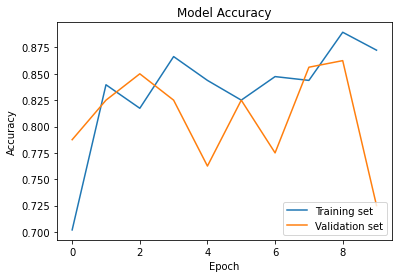

In [61]:
plt.plot(baseline.history['accuracy'])
plt.plot(baseline.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()

### Loss Baseline Plot 

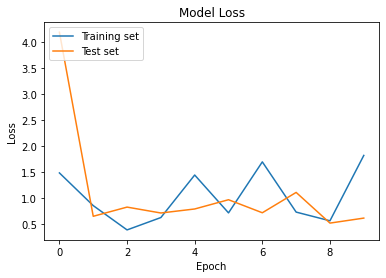

In [62]:
plt.plot(baseline.history['val_loss'])
plt.plot(baseline.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()